In [ ]:
!unzip /content/Dataset_Malaria.zip

Archive:  /content/Dataset_Malaria.zip
   creating: Dataset/Test/
   creating: Dataset/Test/Parasite/
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png  
 extract

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


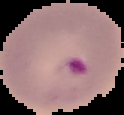

In [ ]:
#let_See_some_data
#Parasite_blood_cells(image show that person is infacted with Maleria)
from IPython.display import Image
Image('/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png')

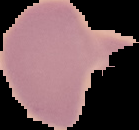

In [ ]:
#Image of Unaffected Person (blood_cells)[Person is not infected with maleria]
Image("/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_145.png")

In [ ]:
#checking_the_image_size
import PIL
image = PIL.Image.open("/content/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_211.png")
width, height = image.size
print(width, height)

115 115


In [ ]:
#resize_image
IMAGE_SIZE =[224,224]
#path_of_training_testing_data
train_path ="/content/Dataset/Train"
test_path ="/content/Dataset/Test"

In [ ]:
#importing the VGG19 and also removing top_layers and we will use pre-trained weight(imagnet weight)
mobilenet =VGG19(include_top=False,input_shape=IMAGE_SIZE +[3],weights='imagenet')

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
#need_not to train the weight a we are using pre trained weight
for layer in mobilenet.layers:
  layer.trainable =False

In [ ]:
#fetehcing the folder
fold =glob("/content/Dataset/Train/*")
fold

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

In [ ]:
#add layers 
X =Flatten()(mobilenet.output)

out_layers =Dense(len(fold),activation='softmax')(X)

In [ ]:
#creating instance of model
model =Model(inputs=mobilenet.input,outputs=out_layers)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#compile_model
model.compile(
    optimizer='adam',
     loss='categorical_crossentropy',
     metrics=['accuracy']
)   

In [ ]:
#using image_generator Generating diff iamges for the data.
train_data_generated =ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         rotation_range=2,
                                         horizontal_flip=True)

test_data_generated =ImageDataGenerator(rescale=1./255)

In [ ]:
#generate train_data mergerd with training data
training_data =train_data_generated.flow_from_directory('/content/Dataset/Train',
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode='categorical')


Found 416 images belonging to 2 classes.


In [ ]:
#generate test_data mergerd with test data
testing_data =test_data_generated.flow_from_directory('/content/Dataset/Test',
                                                        target_size=(224,224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 134 images belonging to 2 classes.


In [ ]:
final_r =model.fit_generator(
    training_data,
    validation_data=testing_data,
    epochs=30,
    steps_per_epoch =len(training_data),
    validation_steps=len(testing_data)
)

Epoch 1/30
13/13 [==============================] - 48s 800ms/step - loss: 1.1803 - accuracy: 0.5769 - val_loss: 0.5927 - val_accuracy: 0.6567
Epoch 2/30
13/13 [==============================] - 8s 582ms/step - loss: 0.4998 - accuracy: 0.7476 - val_loss: 0.5091 - val_accuracy: 0.7463
Epoch 3/30
13/13 [==============================] - 8s 582ms/step - loss: 0.4127 - accuracy: 0.8221 - val_loss: 0.5884 - val_accuracy: 0.6791
Epoch 4/30
13/13 [==============================] - 8s 582ms/step - loss: 0.3899 - accuracy: 0.8077 - val_loss: 0.8119 - val_accuracy: 0.6194
Epoch 5/30
13/13 [==============================] - 8s 577ms/step - loss: 0.3351 - accuracy: 0.8462 - val_loss: 0.4005 - val_accuracy: 0.8507
Epoch 6/30
13/13 [==============================] - 8s 574ms/step - loss: 0.2885 - accuracy: 0.8918 - val_loss: 0.4958 - val_accuracy: 0.7537
Epoch 7/30
13/13 [==============================] - 8s 574ms/step - loss: 0.2706 - accuracy: 0.8870 - val_loss: 0.5188 - val_accuracy: 0.7164
Epoch

In [ ]:
#save this model so that we can do testing by using tgis model..
#save it as h5 file
from tensorflow.keras.models import load_model
model.save('model_VGG19.h5')

In [ ]:
y_pred =model.predict(testing_data)
y_pred

array([[1.93823487e-01, 8.06176543e-01],
       [4.11084116e-01, 5.88915944e-01],
       [4.15345848e-01, 5.84654152e-01],
       [1.41669447e-02, 9.85833049e-01],
       [4.56187166e-02, 9.54381287e-01],
       [8.15461278e-01, 1.84538722e-01],
       [3.66939115e-03, 9.96330678e-01],
       [9.54561591e-01, 4.54384536e-02],
       [4.62178141e-02, 9.53782201e-01],
       [5.12115240e-01, 4.87884760e-01],
       [9.92781460e-01, 7.21861329e-03],
       [1.35451481e-01, 8.64548504e-01],
       [9.39716637e-01, 6.02833964e-02],
       [1.01261903e-02, 9.89873767e-01],
       [3.87459015e-03, 9.96125400e-01],
       [4.55657989e-01, 5.44342041e-01],
       [9.41675067e-01, 5.83249070e-02],
       [1.73513368e-02, 9.82648611e-01],
       [6.66340113e-01, 3.33659887e-01],
       [9.35678631e-02, 9.06432152e-01],
       [3.69597636e-02, 9.63040233e-01],
       [1.28999893e-02, 9.87100005e-01],
       [9.89197433e-01, 1.08025754e-02],
       [9.77157533e-01, 2.28424612e-02],
       [9.841968

In [ ]:
y_pred =np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
np.shape(y_pred)

(134,)

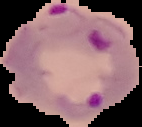

In [ ]:
Image("/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_VGG19.h5')

In [ ]:
#let us check with model this same image .
img=image.load_img('/content/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.02677543, 0.9732246 ]], dtype=float32)

In [ ]:
result =np.argmax(model.predict(img_data),axis=1)

In [ ]:
if (result == 1):
  print("Sample is tested +ve For Maleria[Parasite]")
else :
  print("Sample is tested -ve For Maleria[Parasite]")

Sample is tested +ve For Maleria[Parasite]
